In [9]:
import torch
print(torch.cuda.is_available())  # Returns True if CUDA is available, otherwise False


False


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as fn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import os
import random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


SPECIFY THE DIRECTORIES AND TRANSFORMATIONS

In [ ]:
TRAINING_DIR = "Dataset\MNIST Dataset JPG format\MNIST Dataset JPG format\MNIST - JPG - testing"
TEST_DIR = "Dataset\MNIST Dataset JPG format\MNIST Dataset JPG format\MNIST - JPG - training"

In [ ]:


trans = transforms.Compose([
  transforms.Grayscale(),
  transforms.Resize(28),
  transforms.ToTensor(),
  transforms.Normalize(mean=(0.5,), std=(0.5,))
])

In [ ]:
# Membuat dataset menggunakan ImageFolder
trainfolder = datasets.ImageFolder(root=TRAINING_DIR, transform=trans)
testfolder = datasets.ImageFolder(root=TEST_DIR, transform=trans)

#trainloader = data.DataLoader(trainfolder, batch_size=128, shuffle=True, num_workers=12)
#testloader = data.DataLoader(testfolder, batch_size=128, shuffle=True, num_workers=12)

# Mengambil indeks acak untuk 800 sampel dari data training
num_training_samples = 800
train_indices = list(range(len(trainfolder)))
random.shuffle(train_indices)
random_train_indices = train_indices[:num_training_samples]

# Membuat SubsetRandomSampler dengan indeks acak untuk data training
train_sampler = SubsetRandomSampler(random_train_indices)

# Membuat DataLoader dengan sampler untuk data training
trainloader = DataLoader(trainfolder, batch_size=128, sampler=train_sampler, num_workers=12)

# Mengambil indeks acak untuk 200 sampel dari data testing
num_test_samples = 200
test_indices = list(range(len(testfolder)))
random.shuffle(test_indices)
random_test_indices = test_indices[:num_test_samples]

# Membuat SubsetRandomSampler dengan indeks acak untuk data testing
test_sampler = SubsetRandomSampler(random_test_indices)

# Membuat DataLoader dengan sampler untuk data testing
testloader = DataLoader(testfolder, batch_size=128, sampler=test_sampler, num_workers=12)

In [13]:
class MNISTAE(nn.Module):
  def __init__(self):
    super().__init__()

    self.encoder = nn.Sequential(
      nn.Conv2d(1, 8, kernel_size=5),
      nn.ReLU(True),
      nn.Conv2d(8, 16, kernel_size=5),
      nn.ReLU(True)
    )
    self.decoder = nn.Sequential(
      nn.ConvTranspose2d(16, 8, kernel_size=5),
      nn.ReLU(True),
      nn.ConvTranspose2d(8, 1, kernel_size=5),
      nn.Tanh()
    )

  def encode(self, x):
    return self.encoder(x)

  def decode(self, x):
    return self.decoder(x)

  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x

In [14]:
ae = MNISTAE()
loss_function = nn.MSELoss()
adam = optim.SGD(ae.parameters(), lr=1e-3, momentum=0.9)


100%|██████████| 469/469 [01:04<00:00,  7.25it/s]




[1] Train Loss=0.12269896268844604 Test Loss=0.11884230375289917




100%|██████████| 469/469 [01:02<00:00,  7.47it/s]




[2] Train Loss=0.07373472303152084 Test Loss=0.07634933292865753




100%|██████████| 469/469 [01:01<00:00,  7.60it/s]




[3] Train Loss=0.06748510152101517 Test Loss=0.056592896580696106




100%|██████████| 469/469 [01:01<00:00,  7.61it/s]




[4] Train Loss=0.05130282789468765 Test Loss=0.05103391036391258




100%|██████████| 469/469 [01:05<00:00,  7.14it/s]




[5] Train Loss=0.039249807596206665 Test Loss=0.04465518891811371




100%|██████████| 469/469 [01:02<00:00,  7.46it/s]




[6] Train Loss=0.03868363797664642 Test Loss=0.041630834341049194




100%|██████████| 469/469 [00:57<00:00,  8.16it/s]




[7] Train Loss=0.03945130854845047 Test Loss=0.03929191455245018




100%|██████████| 469/469 [00:56<00:00,  8.28it/s]




[8] Train Loss=0.0331878699362278 Test Loss=0.037110209465026855




100%|██████████| 469/469 [00:56<00:00,  8.25it/s]




[9] Train Loss=0.034429196268320084 Test Loss=0.03434593975543976




100%|██████████| 469/469 [00:57<00:00,  8.22it/s]




[10] Train Loss=0.02838270366191864 Test Loss=0.03416718915104866




100%|██████████| 469/469 [00:55<00:00,  8.45it/s]




[11] Train Loss=0.03213094174861908 Test Loss=0.033239152282476425




100%|██████████| 469/469 [00:55<00:00,  8.44it/s]




[12] Train Loss=0.028869280591607094 Test Loss=0.031642574816942215




100%|██████████| 469/469 [00:59<00:00,  7.90it/s]




[13] Train Loss=0.026950880885124207 Test Loss=0.029677825048565865




100%|██████████| 469/469 [00:55<00:00,  8.44it/s]




[14] Train Loss=0.029593363404273987 Test Loss=0.030357474461197853




100%|██████████| 469/469 [00:55<00:00,  8.44it/s]




[15] Train Loss=0.024672619998455048 Test Loss=0.028685718774795532




100%|██████████| 469/469 [00:56<00:00,  8.34it/s]




[16] Train Loss=0.030223272740840912 Test Loss=0.027582338079810143




100%|██████████| 469/469 [00:56<00:00,  8.30it/s]




[17] Train Loss=0.027884388342499733 Test Loss=0.030159644782543182




100%|██████████| 469/469 [00:56<00:00,  8.30it/s]




[18] Train Loss=0.02643446996808052 Test Loss=0.02699093334376812




100%|██████████| 469/469 [00:57<00:00,  8.11it/s]




[19] Train Loss=0.02470737136900425 Test Loss=0.025045420974493027




100%|██████████| 469/469 [00:57<00:00,  8.20it/s]




[20] Train Loss=0.020719340071082115 Test Loss=0.023123739287257195




100%|██████████| 469/469 [00:57<00:00,  8.13it/s]
C:\Users\Unity_Comp\AppData\Local\Temp\ipykernel_2596\3627931547.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()




[21] Train Loss=0.02468590810894966 Test Loss=0.02468017116189003




100%|██████████| 469/469 [00:57<00:00,  8.12it/s]




[22] Train Loss=0.025288699194788933 Test Loss=0.024594435468316078




100%|██████████| 469/469 [00:56<00:00,  8.26it/s]




[23] Train Loss=0.023652808740735054 Test Loss=0.02257111482322216




100%|██████████| 469/469 [00:56<00:00,  8.23it/s]




[24] Train Loss=0.02255534566938877 Test Loss=0.02392519637942314




100%|██████████| 469/469 [00:57<00:00,  8.18it/s]




[25] Train Loss=0.022176606580615044 Test Loss=0.02314811572432518




100%|██████████| 469/469 [00:57<00:00,  8.20it/s]




[26] Train Loss=0.022365927696228027 Test Loss=0.0211381483823061




100%|██████████| 469/469 [00:56<00:00,  8.32it/s]




[27] Train Loss=0.01774558424949646 Test Loss=0.020877473056316376




100%|██████████| 469/469 [00:55<00:00,  8.39it/s]




[28] Train Loss=0.017492061480879784 Test Loss=0.02062530629336834




100%|██████████| 469/469 [00:55<00:00,  8.46it/s]




[29] Train Loss=0.01636223867535591 Test Loss=0.022231748327612877




100%|██████████| 469/469 [00:56<00:00,  8.32it/s]




[30] Train Loss=0.02017483301460743 Test Loss=0.020376011729240417




100%|██████████| 469/469 [00:56<00:00,  8.32it/s]




[31] Train Loss=0.01561847236007452 Test Loss=0.021275732666254044




100%|██████████| 469/469 [00:55<00:00,  8.41it/s]




[32] Train Loss=0.017630718648433685 Test Loss=0.019723525270819664




100%|██████████| 469/469 [00:56<00:00,  8.37it/s]




[33] Train Loss=0.02068631537258625 Test Loss=0.01940804347395897




100%|██████████| 469/469 [00:55<00:00,  8.43it/s]




[34] Train Loss=0.01888478361070156 Test Loss=0.017759939655661583




100%|██████████| 469/469 [00:59<00:00,  7.88it/s]




[35] Train Loss=0.01915983110666275 Test Loss=0.018617963418364525




100%|██████████| 469/469 [00:56<00:00,  8.34it/s]




[36] Train Loss=0.017675690352916718 Test Loss=0.02032693661749363




100%|██████████| 469/469 [00:56<00:00,  8.30it/s]




[37] Train Loss=0.020026521757245064 Test Loss=0.018283285200595856




100%|██████████| 469/469 [00:56<00:00,  8.30it/s]




[38] Train Loss=0.02071448042988777 Test Loss=0.018391281366348267




100%|██████████| 469/469 [00:57<00:00,  8.18it/s]




[39] Train Loss=0.018828516826033592 Test Loss=0.017901794984936714




100%|██████████| 469/469 [00:55<00:00,  8.43it/s]




[40] Train Loss=0.016623908653855324 Test Loss=0.018116571009159088




100%|██████████| 469/469 [01:02<00:00,  7.56it/s]




[41] Train Loss=0.017201386392116547 Test Loss=0.016182655468583107




100%|██████████| 469/469 [00:56<00:00,  8.32it/s]




[42] Train Loss=0.017041772603988647 Test Loss=0.017142150551080704




100%|██████████| 469/469 [00:56<00:00,  8.26it/s]




[43] Train Loss=0.015102735720574856 Test Loss=0.017258023843169212




100%|██████████| 469/469 [00:57<00:00,  8.21it/s]




[44] Train Loss=0.018435809761285782 Test Loss=0.018127046525478363




100%|██████████| 469/469 [00:55<00:00,  8.38it/s]




[45] Train Loss=0.016904322430491447 Test Loss=0.017269128933548927




100%|██████████| 469/469 [00:55<00:00,  8.38it/s]




[46] Train Loss=0.01589467190206051 Test Loss=0.01739206165075302




100%|██████████| 469/469 [00:55<00:00,  8.39it/s]




[47] Train Loss=0.01941891573369503 Test Loss=0.016698427498340607




100%|██████████| 469/469 [00:56<00:00,  8.26it/s]




[48] Train Loss=0.014773767441511154 Test Loss=0.015728067606687546




100%|██████████| 469/469 [00:56<00:00,  8.35it/s]




[49] Train Loss=0.01389982271939516 Test Loss=0.015559984371066093




100%|██████████| 469/469 [00:56<00:00,  8.31it/s]




[50] Train Loss=0.014981307089328766 Test Loss=0.016549305990338326




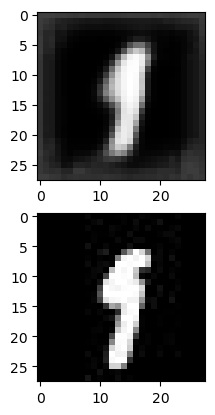

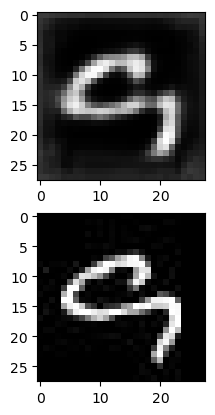

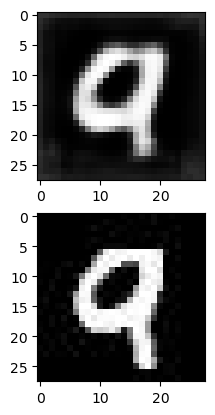

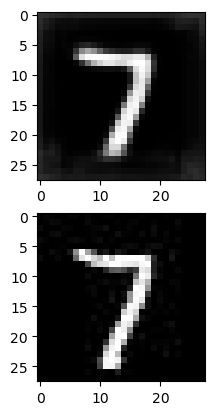

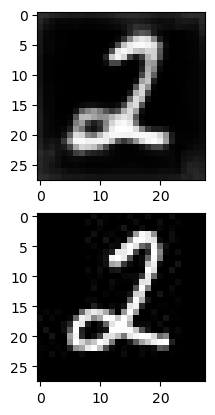

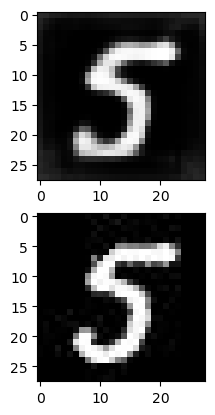

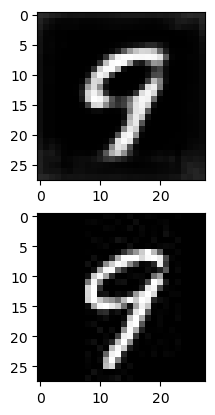

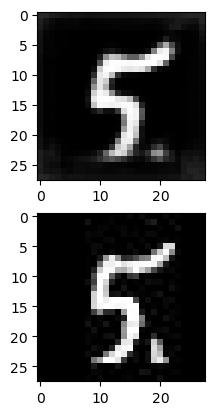

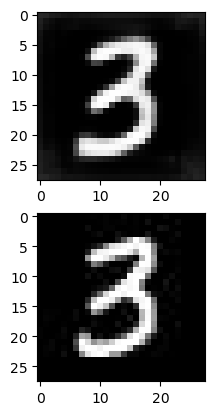

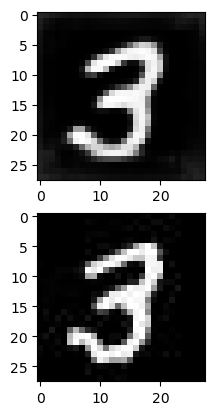

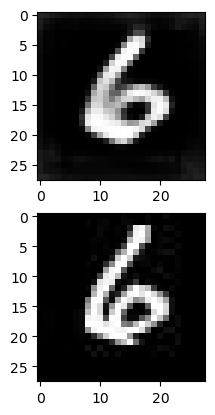

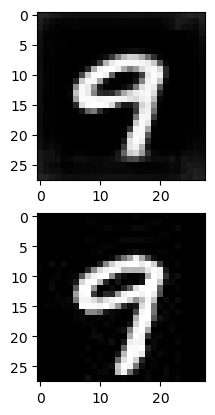

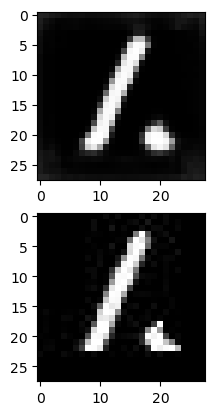

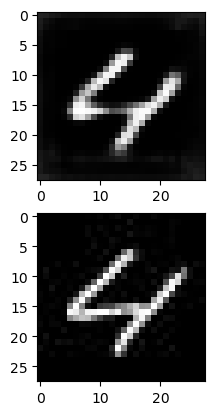

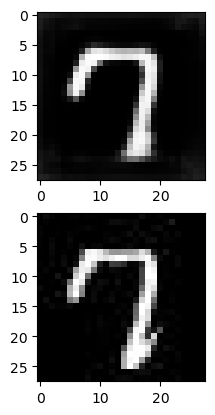

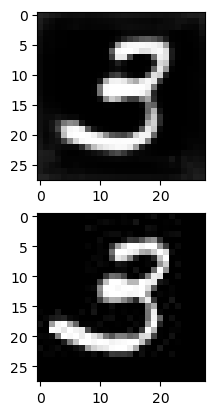

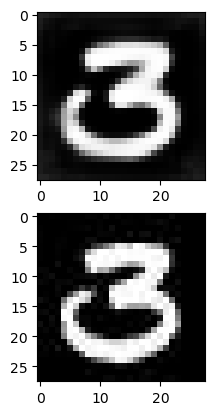

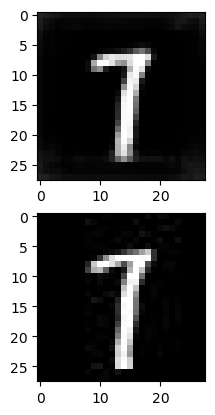

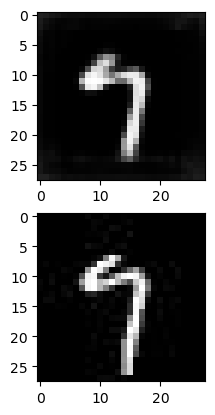

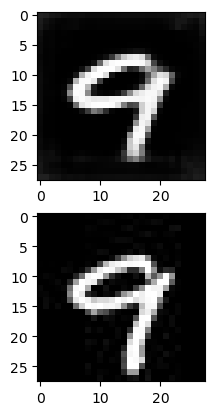

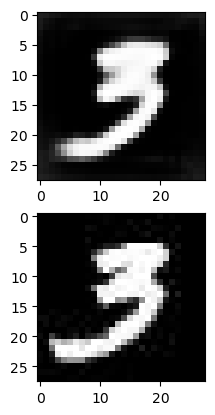

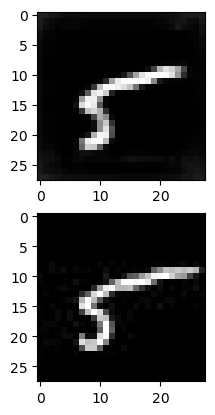

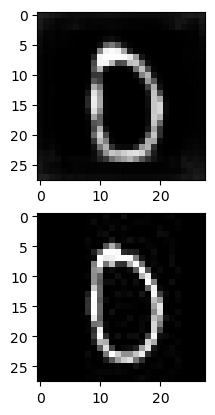

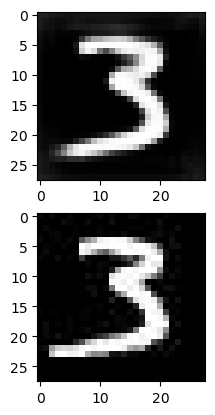

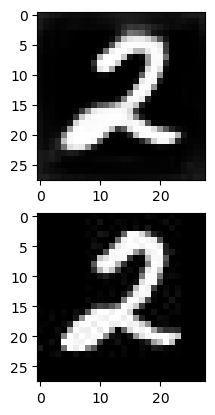

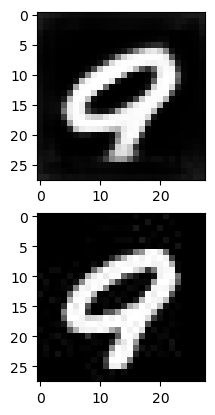

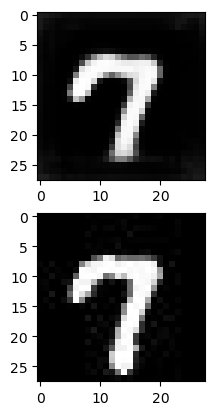

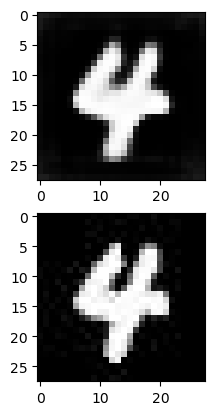

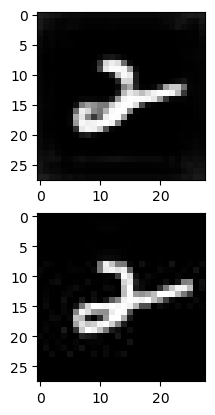

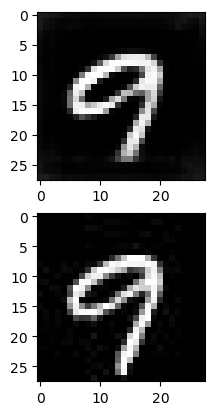

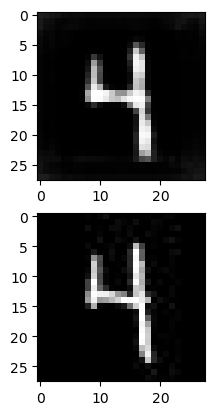

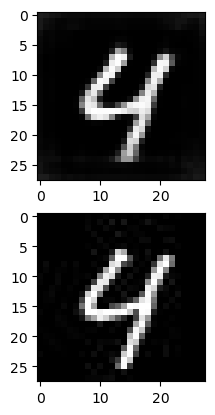

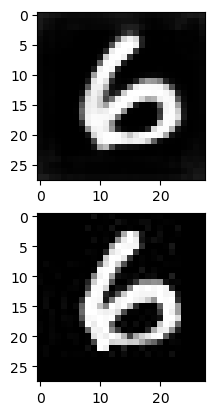

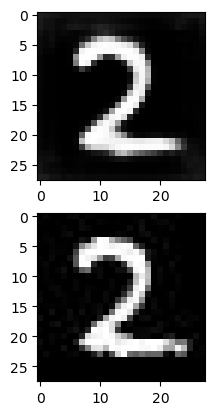

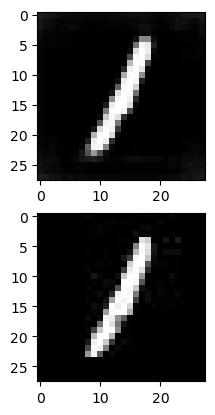

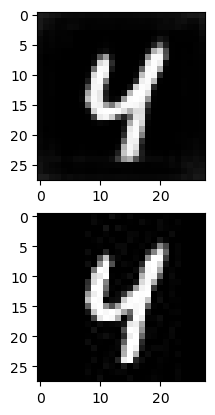

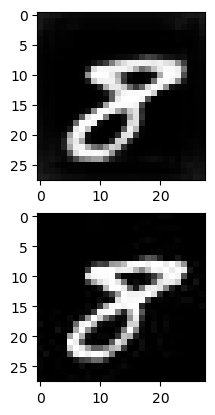

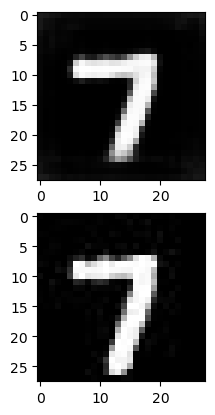

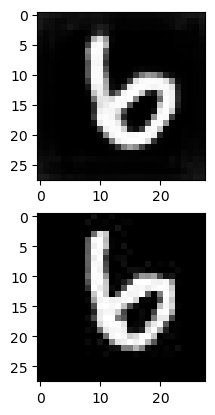

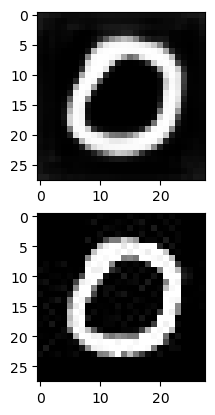

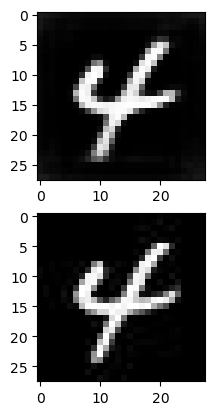

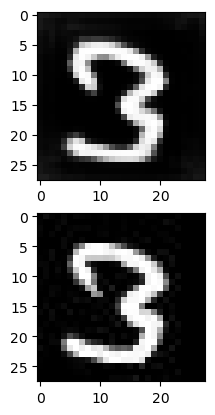

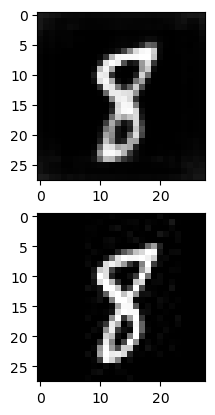

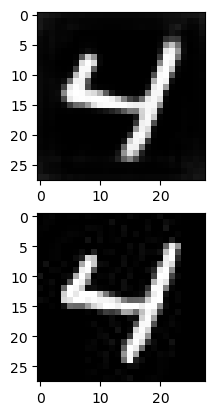

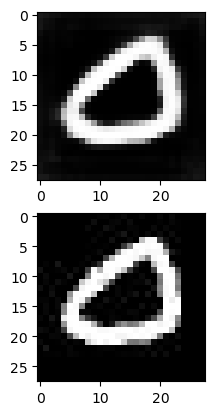

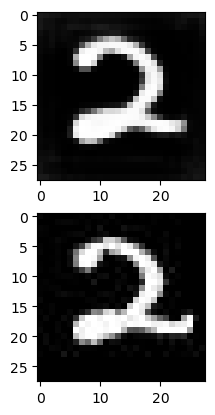

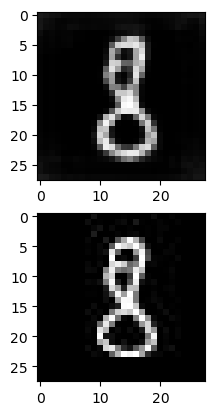

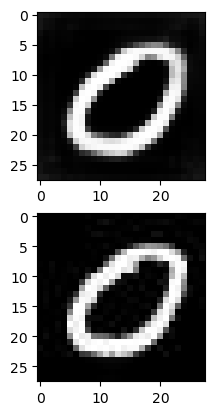

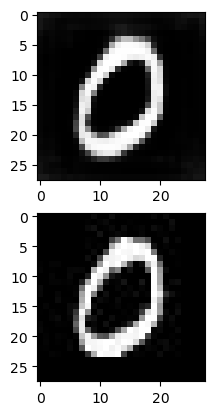

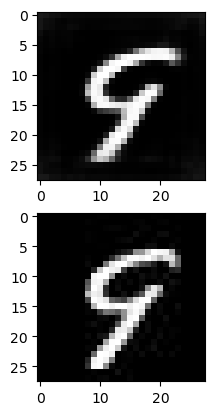

In [16]:
for epoch in range(50):
  for x, _ in tqdm(trainloader):
    x = x.float()
    
    adam.zero_grad()

    x_pred = ae.forward(x)

    train_loss = loss_function(x_pred, x)
    train_loss.backward()
    adam.step()

  for x, _ in tqdm(testloader):
    x = x.float()

    x_pred = ae.forward(x)

    test_loss = loss_function(x_pred, x)
 
  pred_img = np.moveaxis(x_pred.detach().cpu().numpy()[0], 0, -1).reshape(28, 28)
  img = np.moveaxis(x.detach().cpu().numpy()[0], 0, -1).reshape(28, 28) 

  fig = plt.figure()

  ax1 = fig.add_subplot(2, 1, 1)
  ax1.imshow(pred_img, cmap='gray')
  ax2 = fig.add_subplot(2, 1, 2)
  ax2.imshow(img, cmap='gray')
  fig.savefig("mnist_conv_autoencoder_images/generated_image_epoch_{}.png".format(epoch+1))

  print("\n")
  print("[{}] Train Loss={} Test Loss={}".format(epoch+1, train_loss.detach().cpu().numpy(), test_loss.detach().cpu().numpy()))
  print("\n")

In [17]:
torch.save(ae.state_dict(), "mnist_conv_autoencoder_weights.pth")